# **Redes neuronales completamente conectadas aplicadas en Fashion MNIST  reconocimiento de prendas de vestir**

  1. Carga del conjunto de datos Fashion MNIST

In [2]:
# Carga del conjunto de datos Fashion MNIST
import keras
fmnist = keras.datasets.fashion_mnist

  2. Carga division de datos entrenamiento y prueba

In [6]:
#carga sivision de datos entrenamiento y prueba
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


  3. Visualizacion de una muestra

Label:  0
Image:
   [[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 15

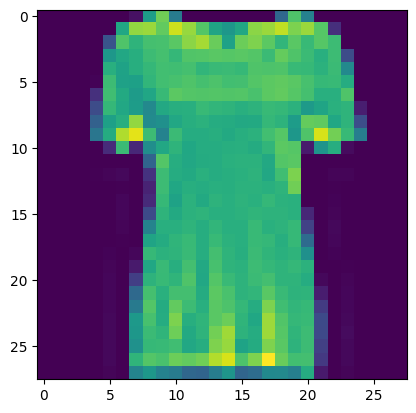

In [10]:
 #Visualizacion de una muestra
 import numpy as np
 import matplotlib.pyplot as plt
 #se puede visualizar ejeplos de imagenes entre 0 y 59999
 index = 10
 # Imprime la etiqueta y la imagen
 np.set_printoptions(linewidth=320)
 print (f'Label:  {training_labels[index]}')
 print (f'Image:\n   {training_images[index]}')
# Visualiza la imagen
plt.imshow(training_images[index])


  4. Normalizacion de datos

In [11]:
#Normalizacion los valores de pixeles del tren y proiar las imagenes
training_images = training_images /255.0
test_images = test_images /255.0

  5. Cosntruccion del modelo

In [13]:
#Cosntruccion del modelo de clasificacion
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10,activation='softmax')])

  6. Compilacion del modelo

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


  7 Entrenar el modelo

In [15]:
#Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5018 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3743 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3360 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3120 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2930 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2807 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2674 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2562 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2487 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

  8 graficar el historial de entrenamiento

<Axes: >

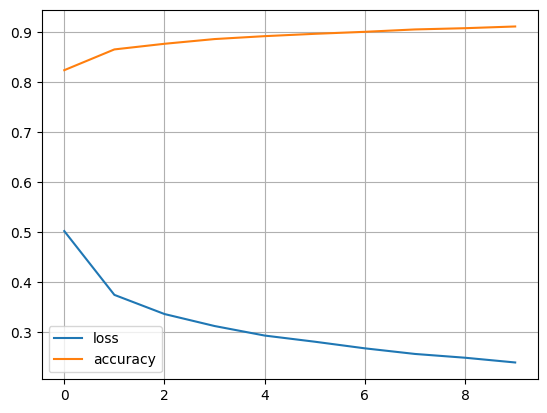

In [17]:
# Graficar el historial del entrenamiento
import pandas as pd
df = pd.DataFrame()
pd.DataFrame(history.history).plot(grid=True)

  9 Evaluacion del modelo

In [18]:
# Evaluacion del modelo
loss, accuracy = model.evaluate(training_images, training_labels)
print ("Perdida en el conjunto de entrenamiento: ", loss)
print ("Prescision en el conjuno de entrenamiento:" , accuracy)

# Evaluacion del modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print ("Perdida en el conjunto de pruebas: ", loss)
print ("Prescision en el conjuno de pruebas:" , accuracy)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.9000
Perdida en el conjunto de entrenamiento:  0.269828200340271
Prescision en el conjuno de entrenamiento: 0.9000333547592163
313/313 [==============================] - 1s 3ms/step - loss: 0.3914 - accuracy: 0.8680
Perdida en el conjunto de pruebas:  0.39135101437568665
Prescision en el conjuno de pruebas: 0.8679999709129333
